In [1]:
import pandas as pd

dataLocation = "properati.csv"






In [2]:
dataFrame = pd.read_csv(dataLocation, sep = ",")

dataFrame.index

#dataFrame.loc[9761,:]

RangeIndex(start=0, stop=121220, step=1)

In [3]:
newDataFrame = dataFrame.loc[:,["price","currency","price_aprox_local_currency","price_aprox_usd"]]
#Me quede con las columnas asignadas

In [4]:
newDataFrame.head(3)

#newDataFrame.shape

#newDataFrame.dtypes

#newDataFrame.loc[9761,:]

,price,currency,price_aprox_local_currency,price_aprox_usd
0,62000.0,USD,1093959.0,62000.0
1,150000.0,USD,2646675.0,150000.0
2,72000.0,USD,1270404.0,72000.0


In [5]:
import re
import numpy as np
USDpattern = "USD"

USDmatch = newDataFrame.currency.apply(lambda x : x == USDpattern)

In [6]:
USDmatch.values.sum()

#newDataFrame.price.isnull().sum()

87587

In [7]:
newGroup = newDataFrame.groupby("currency").count()

newGroup.head(10)



#Verifico la cantidad de filas con otras monedas

,price,price_aprox_local_currency,price_aprox_usd
currency,,,
ARS,13219,13219,13219
PEN,2,2,2
USD,87587,87587,87587
UYU,1,1,1


In [8]:
PENpattern = "PEN"


UYUpattern = "UYU"


ARSpattern = "ARS"

In [9]:
PENmatch = newDataFrame.currency.apply(lambda x : x == PENpattern)

In [10]:
UYUmatch = newDataFrame.currency.apply(lambda x : x == UYUpattern)

In [11]:
ARSmatch = newDataFrame.currency.apply(lambda x : x == ARSpattern)

In [12]:
dataFrameRounded = newDataFrame.round(2)

dataFrameRounded.head(10)

#Defino matches para identificar las monedas que no sean dolares

,price,currency,price_aprox_local_currency,price_aprox_usd
0,62000.0,USD,1093959.00,62000.00
1,150000.0,USD,2646675.00,150000.00
2,72000.0,USD,1270404.00,72000.00
3,95000.0,USD,1676227.50,95000.00
4,64000.0,USD,1129248.00,64000.00
5,NaN,NaN,NaN,NaN
6,130000.0,USD,2293785.00,130000.00
7,138000.0,USD,2434941.00,138000.00
8,195000.0,USD,3440677.50,195000.00
9,460000.0,ARS,455201.45,25798.49


In [13]:

dataFrameRounded["dollarPrice"] = USDmatch
dataFrameRounded["PENprice"] = PENmatch
dataFrameRounded["UYUprice"] = UYUmatch
dataFrameRounded["ARSprice"] = ARSmatch

dataFrameRounded.head(10)
#dataFrameRounded.index
#Me genere columnas descriptivas para facilitar la futura limpieza

,price,currency,price_aprox_local_currency,price_aprox_usd,dollarPrice,PENprice,UYUprice,ARSprice
0,62000.0,USD,1093959.00,62000.00,True,False,False,False
1,150000.0,USD,2646675.00,150000.00,True,False,False,False
2,72000.0,USD,1270404.00,72000.00,True,False,False,False
3,95000.0,USD,1676227.50,95000.00,True,False,False,False
4,64000.0,USD,1129248.00,64000.00,True,False,False,False
5,NaN,NaN,NaN,NaN,False,False,False,False
6,130000.0,USD,2293785.00,130000.00,True,False,False,False
7,138000.0,USD,2434941.00,138000.00,True,False,False,False
8,195000.0,USD,3440677.50,195000.00,True,False,False,False
9,460000.0,ARS,455201.45,25798.49,False,False,False,True


In [14]:
currencyNullMatch = dataFrameRounded.currency.isnull()
priceNullMatch = dataFrameRounded.price.isnull()

In [15]:
dataFrameRounded["currencyNull"] = currencyNullMatch
dataFrameRounded["priceNull"] = priceNullMatch

In [16]:
dataFrameRounded.dtypes

#Comparo los nulos de precios con las monedas para verificar que son iguales

price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
dollarPrice                      bool
PENprice                         bool
UYUprice                         bool
ARSprice                         bool
currencyNull                     bool
priceNull                        bool
dtype: object

In [17]:
boolVer = dataFrameRounded.currencyNull == dataFrameRounded.priceNull

In [18]:
boolVer.sum()

121219

In [19]:
boolVer2 = dataFrameRounded.price_aprox_local_currency.isnull() == dataFrameRounded.price_aprox_usd.isnull()

In [20]:
boolVer2.sum()

121220

In [21]:
boolVerFinal = dataFrameRounded.price_aprox_local_currency.isnull() == dataFrameRounded.currencyNull

In [22]:
boolVerFinal.sum()

121219

In [23]:
print(dataFrameRounded.index)

filterMask = -(boolVer-1)

type(filterMask)

filterMask[filterMask == 1]

dataFrameRounded.loc[9761,:]

#dataToGet = dataFrameRounded.currency[filterMask]
dataFrameRounded.dtypes
#print(dataToGet)

#Aca se aprecia que esta fila no tiene nulos salvo el valor de currency, los demas valoers son ceros.

RangeIndex(start=0, stop=121220, step=1)


price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
dollarPrice                      bool
PENprice                         bool
UYUprice                         bool
ARSprice                         bool
currencyNull                     bool
priceNull                        bool
dtype: object

In [24]:
dataFrameRounded.loc[9761,:] = np.NaN


#Reemplazo los valores ceros con NaN

In [25]:
dataFrameRounded.loc[9761,["dollarPrice","PENprice","UYUprice","ARSprice"]]=False
dataFrameRounded.loc[9761,["currencyNull","priceNull"]]=True

In [26]:
dataFrameRounded.loc[9761,:]


price                           NaN
currency                        NaN
price_aprox_local_currency      NaN
price_aprox_usd                 NaN
dollarPrice                   False
PENprice                      False
UYUprice                      False
ARSprice                      False
currencyNull                   True
priceNull                      True
Name: 9761, dtype: object

In [27]:
dataFrameRounded.dtypes   #dataFrameRounded.loc[dataFrameRounded.dollarPrice,:] = -1

price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
dollarPrice                    object
PENprice                       object
UYUprice                       object
ARSprice                       object
currencyNull                   object
priceNull                      object
dtype: object

In [28]:
dataFrameRounded.dtypes

price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
dollarPrice                    object
PENprice                       object
UYUprice                       object
ARSprice                       object
currencyNull                   object
priceNull                      object
dtype: object

In [29]:
dataFrameRounded.price_aprox_usd.values[dataFrameRounded.dollarPrice.values.astype(bool)] = -1

In [30]:
dataFrameRounded.head(10)

,price,currency,price_aprox_local_currency,price_aprox_usd,dollarPrice,PENprice,UYUprice,ARSprice,currencyNull,priceNull
0,62000.0,USD,1093959.00,-1.00,1,0,0,0,0,0
1,150000.0,USD,2646675.00,-1.00,1,0,0,0,0,0
2,72000.0,USD,1270404.00,-1.00,1,0,0,0,0,0
3,95000.0,USD,1676227.50,-1.00,1,0,0,0,0,0
4,64000.0,USD,1129248.00,-1.00,1,0,0,0,0,0
5,NaN,NaN,NaN,NaN,0,0,0,0,1,1
6,130000.0,USD,2293785.00,-1.00,1,0,0,0,0,0
7,138000.0,USD,2434941.00,-1.00,1,0,0,0,0,0
8,195000.0,USD,3440677.50,-1.00,1,0,0,0,0,0
9,460000.0,ARS,455201.45,25798.49,0,0,0,1,0,0


In [31]:
dataFrameRounded.index

RangeIndex(start=0, stop=121220, step=1)

In [32]:
dataFrameRounded.dollarPrice.astype(bool)
dataFrameRounded.PENprice.astype(bool)
dataFrameRounded.UYUprice.astype(bool)
dataFrameRounded.ARSprice.astype(bool)

0         False
1         False
2         False
3         False
4         False
          ...  
121215    False
121216    False
121217    False
121218    False
121219    False
Name: ARSprice, Length: 121220, dtype: bool

In [33]:
dataFrameRounded.index

RangeIndex(start=0, stop=121220, step=1)

In [34]:
dataFrameRounded.dtypes

price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
dollarPrice                    object
PENprice                       object
UYUprice                       object
ARSprice                       object
currencyNull                   object
priceNull                      object
dtype: object

In [35]:
dataFrameRounded.dollarPrice.isnull().sum()

0

In [36]:
#dataFrameRounded[dataFrameRounded.dollarPrice.isnull()]

In [37]:
dataFrameRounded.price.values[dataFrameRounded.PENprice == 1] = dataFrameRounded.price_aprox_usd.values[dataFrameRounded.PENprice==1]

dataFrameRounded.price.values[dataFrameRounded.UYUprice == 1] = dataFrameRounded.price_aprox_usd.values[dataFrameRounded.UYUprice==1]

dataFrameRounded.price.values[dataFrameRounded.ARSprice == 1] = dataFrameRounded.price_aprox_usd.values[dataFrameRounded.ARSprice==1]

In [38]:
dataFrameRounded.head(10)

,price,currency,price_aprox_local_currency,price_aprox_usd,dollarPrice,PENprice,UYUprice,ARSprice,currencyNull,priceNull
0,62000.00,USD,1093959.00,-1.00,1,0,0,0,0,0
1,150000.00,USD,2646675.00,-1.00,1,0,0,0,0,0
2,72000.00,USD,1270404.00,-1.00,1,0,0,0,0,0
3,95000.00,USD,1676227.50,-1.00,1,0,0,0,0,0
4,64000.00,USD,1129248.00,-1.00,1,0,0,0,0,0
5,NaN,NaN,NaN,NaN,0,0,0,0,1,1
6,130000.00,USD,2293785.00,-1.00,1,0,0,0,0,0
7,138000.00,USD,2434941.00,-1.00,1,0,0,0,0,0
8,195000.00,USD,3440677.50,-1.00,1,0,0,0,0,0
9,25798.49,ARS,455201.45,25798.49,0,0,0,1,0,0


In [39]:
dataFrameRounded.currency = "USD"

In [40]:
dataFrameRounded.head(10)

,price,currency,price_aprox_local_currency,price_aprox_usd,dollarPrice,PENprice,UYUprice,ARSprice,currencyNull,priceNull
0,62000.00,USD,1093959.00,-1.00,1,0,0,0,0,0
1,150000.00,USD,2646675.00,-1.00,1,0,0,0,0,0
2,72000.00,USD,1270404.00,-1.00,1,0,0,0,0,0
3,95000.00,USD,1676227.50,-1.00,1,0,0,0,0,0
4,64000.00,USD,1129248.00,-1.00,1,0,0,0,0,0
5,NaN,USD,NaN,NaN,0,0,0,0,1,1
6,130000.00,USD,2293785.00,-1.00,1,0,0,0,0,0
7,138000.00,USD,2434941.00,-1.00,1,0,0,0,0,0
8,195000.00,USD,3440677.50,-1.00,1,0,0,0,0,0
9,25798.49,USD,455201.45,25798.49,0,0,0,1,0,0


In [41]:
dataFrameRounded.drop(columns = ["price_aprox_usd","price_aprox_local_currency","dollarPrice","PENprice","UYUprice","ARSprice","currencyNull","priceNull"], inplace = True)

In [42]:
dataFrameRounded.head(10)

,price,currency
0,62000.00,USD
1,150000.00,USD
2,72000.00,USD
3,95000.00,USD
4,64000.00,USD
5,NaN,USD
6,130000.00,USD
7,138000.00,USD
8,195000.00,USD
9,25798.49,USD


In [43]:
dataFrameRounded.head(10)

,price,currency
0,62000.00,USD
1,150000.00,USD
2,72000.00,USD
3,95000.00,USD
4,64000.00,USD
5,NaN,USD
6,130000.00,USD
7,138000.00,USD
8,195000.00,USD
9,25798.49,USD


In [44]:
dataFrameRounded.round(2)

,price,currency
0,62000.0,USD
1,150000.0,USD
2,72000.0,USD
3,95000.0,USD
4,64000.0,USD
...,...,...
121215,870000.0,USD
121216,498000.0,USD
121217,131500.0,USD
121218,95900.0,USD


In [45]:
dataFrameRounded.price.isnull().sum()

20411

In [46]:
dataFrameClean = dataFrameRounded

In [47]:
dataFrameClean.isnull().sum()

price       20411
currency        0
dtype: int64

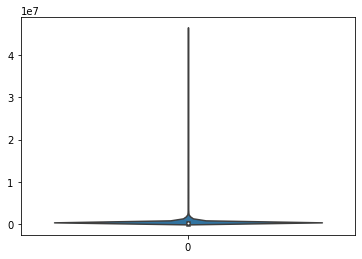

In [48]:
import seaborn as sea

sea.violinplot(data = dataFrameClean.price)

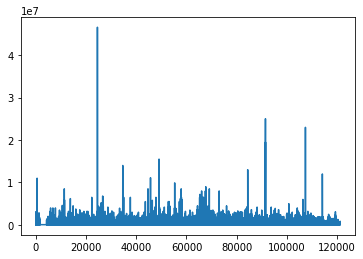

In [49]:
sea.lineplot(style="event",data=dataFrameClean.price)

In [50]:
pricesGroups = pd.qcut(dataFrameClean.price, 6)

In [51]:
groupVector = pricesGroups.drop_duplicates(keep = "first")

In [52]:
groupVector.reset_index()

,index,price
0,0,"(4666.619, 76273.8]"
1,1,"(145000.0, 211456.973]"
2,3,"(76273.8, 105600.0]"
3,5,NaN
4,6,"(105600.0, 145000.0]"
5,15,"(211456.973, 350000.0]"
6,18,"(350000.0, 46545445.0]"


In [53]:
groupVector.index = [0,1,2,3,4,5,6]


In [54]:
groupVector

0       (4666.619, 76273.8]
1    (145000.0, 211456.973]
2       (76273.8, 105600.0]
3                       NaN
4      (105600.0, 145000.0]
5    (211456.973, 350000.0]
6    (350000.0, 46545445.0]
Name: price, dtype: category
Categories (6, interval[float64]): [(4666.619, 76273.8] < (76273.8, 105600.0] < (105600.0, 145000.0] < (145000.0, 211456.973] < (211456.973, 350000.0] < (350000.0, 46545445.0]]

In [55]:
groupVector.drop(3, axis = 0,inplace = True)

In [56]:
groupVector.index = [0,1,2,3,4,5]

In [57]:
groupVector.sort_values()

0       (4666.619, 76273.8]
2       (76273.8, 105600.0]
3      (105600.0, 145000.0]
1    (145000.0, 211456.973]
4    (211456.973, 350000.0]
5    (350000.0, 46545445.0]
Name: price, dtype: category
Categories (6, interval[float64]): [(4666.619, 76273.8] < (76273.8, 105600.0] < (105600.0, 145000.0] < (145000.0, 211456.973] < (211456.973, 350000.0] < (350000.0, 46545445.0]]

In [58]:
groupVector.index = ["firstGroup","secondGroup","thirdGroup","fourthGroup","fifthGroup","sisxthGroup"]

In [59]:
groupVector

firstGroup        (4666.619, 76273.8]
secondGroup    (145000.0, 211456.973]
thirdGroup        (76273.8, 105600.0]
fourthGroup      (105600.0, 145000.0]
fifthGroup     (211456.973, 350000.0]
sisxthGroup    (350000.0, 46545445.0]
Name: price, dtype: category
Categories (6, interval[float64]): [(4666.619, 76273.8] < (76273.8, 105600.0] < (105600.0, 145000.0] < (145000.0, 211456.973] < (211456.973, 350000.0] < (350000.0, 46545445.0]]

In [60]:
print(pricesGroups[pricesGroups.values == groupVector["firstGroup"]].shape)
print(pricesGroups[pricesGroups.values == groupVector["secondGroup"]].shape)
print(pricesGroups[pricesGroups.values == groupVector["thirdGroup"]].shape)
print(pricesGroups[pricesGroups.values == groupVector["fourthGroup"]].shape)
print(pricesGroups[pricesGroups.values == groupVector["fifthGroup"]].shape)
print(pricesGroups[pricesGroups.values == groupVector["sisxthGroup"]].shape)


(16804,)
(16269,)
(16804,)
(17329,)
(17199,)
(16404,)


In [61]:
quantile25percent = dataFrameClean.quantile(0.25)
quantile75percent = dataFrameClean.quantile(0.75)

#dataFrameClean.mean()

#dataFrameClean[dataFrameClean.price == dataFrameClean.price.min()]

dataFrameClean[dataFrameClean.price == dataFrameClean.price.max()]





,price,currency
24548,46545445.0,USD


In [62]:
quantilInterval = (quantile75percent - quantile25percent) * 1.5

lowerLimit = dataFrameClean.mean().round(2) - quantilInterval
upperLimit = dataFrameClean.mean().round(2) + quantilInterval

print(lowerLimit)
print(upperLimit)

price   -23196.23
dtype: float64
price    502602.13
dtype: float64


In [63]:
#dataFrame.loc[34666,:]
dataFrame.loc[24548,"description"]

'dsdffhghvcvbcdfdfghdfhghkjhkhjklhjkfgvghfghnfghgfhfg'

In [64]:
quantile1percent = dataFrameClean.quantile(0.01)
quantile99percent = dataFrameClean.quantile(0.99)
print(quantile99percent)
print(quantile1percent)

mask1percent = dataFrameClean >= quantile1percent
mask99percent = dataFrameClean <= quantile99percent

intersectionMask = np.logical_and(mask1percent,mask99percent)

price    1504900.88
Name: 0.99, dtype: float64
price    35000.0
Name: 0.01, dtype: float64


In [65]:
#dataFrameCleanI = dataFrameClean[intersectionMask]

In [66]:
#dataFrameCleanI.notnull().sum()
#dataFrameClean



In [67]:
#display(dataFrameCleanI.mean())
#display(dataFrameClean.mean())

In [68]:
#dataFrame[dataFrameCleanI.isnull()]

#dataFrameDroped = dataFrame.dropna(axis=0)

#dataFrame.loc[:,"description"].sample(10)

In [73]:

#dataFrameClean.head(10)
dataFrameClean.dtypes

price       float64
currency     object
dtype: object